<a href="https://colab.research.google.com/github/SchneiderJs/Alzheimer-s-Classifier/blob/main/AlzheimerIdentificationDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Acadêmicos: Gabriel Schneider de Jesus, Gabriel Luís Fernando de Souza e Luciane Tedesco

# Doença de Alzheimer

O Alzheimer afeta cada pessoa de uma forma diferente, dependendo do impacto da doença e a personalidade da pessoa antes de ficar doente. Os sinais e sintomas ligados ao Alzheimer podem ser entendidos em três estágios.


**Estágio inicial:** são muitas vezes ignorados por serem confundidos com “sintomas de velhice” os sintomas desse estágio são:

*	Esquecimento.
*	perder a noção de tempo.
*	ficar perdido em locais conhecidos.

**Estágio intermediário:** conforme vai progredindo, os sintomas vão ficando mais evidentes e mais restritivos, estão inclusos:

*	Ficar esquecido de eventos recentes e do nome das pessoas.
*	Ficar perdido dentro de casa.
*	Ter uma crescente dificuldade na comunicação.
*	Precisar de atenção médica.
*	Experenciar mudanças de comportamento incluindo ficar andando de um lado para o outro e fazer perguntas repetitivas.

**Estágio tardio:** nesse estágio a dependência e inatividade é total, os distúrbios na mente são sérios e os distúrbios físicos ficam mais evidentes, estão inclusos nesses sintomas:

*	perder completamente a noção de tempo e espaço.
*	 ter dificuldade em reconhecer amigos e familiares.
*	Tem uma maior dependência médica para cuidados pessoais.
*	Ter dificuldade para andar.
*	Experenciar mudanças de comportamentos que podem até escalar para agressão.

# Prevendo a doença de Alzheimer

O aprendizado de máquina é amplamente utilizado na área da saúde. Neste trabalho propormos a construção de um modelo utilizando redes convolucionais para determinar se um paciente possui Alzheimer a partir de suas imagens de ressonância magnética.

## Conjunto de dados:

O conjunto de dados consiste em cerca em 6.336 imagens de ressonância magnética. Na qual, apresentam a fase inicial e avançada da doença de Alzheimer, e imagens que não apresentam a doença.
O conjunto de treino e teste está dividido da seguinte forma:

|                          |  Treino       | Teste       |
|--------------------------|:-------------:|:-----------:|
|Sem Alzheimer             |	2560 imagens | 640 imagens |
|Fase inicial do Alzheimer |	717 imagens	 | 179 imagens |
|Fase avançada do Alzheimer|	1792 imagens | 448 imagens |

Abaixo são apresentados alguns exemplos:

|Sem Alzheimer             |Fase Inicial do Alzheimer|Fase avançada do Alzheimer|
|--------------------------|:-------------:|:-------------:|
|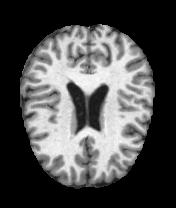|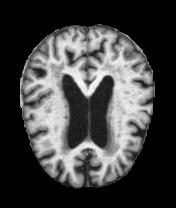|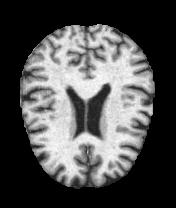|




Found 4352 images belonging to 2 classes.
Found 1088 images belonging to 2 classes.


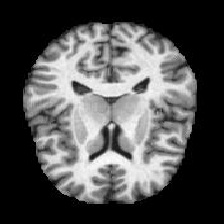

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator


base_folder = '/content/drive/My Drive/Dataset/Alzheimer_s Dataset/'

datagen = ImageDataGenerator()

train_generator = datagen.flow_from_directory(
    directory=f'{base_folder}/train/',
    target_size=(224, 224),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_generator = datagen.flow_from_directory(
    directory=f'{base_folder}/test/',
    target_size=(224, 224),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()
input_shape=(224, 224, 1)

cv2_imshow(x_train[0])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras

cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(1, activation='softmax'))



cnn3.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 52, 52, 128)     

In [ ]:
#compile model using accuracy to measure model performance
cnn3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


cnn3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 873ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 1s 761ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 1s 771ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 1s 778ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 1s 770ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000


In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
        train_generator,
        steps_per_epoch=50,
        epochs=5,
        validation_data=test_generator,
        validation_steps=15)
model.save_weights('first_try.h5')

In [ ]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

In [ ]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [ ]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=input_shape),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    
    return model

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

with strategy.scope():
    model = build_model()

    METRICS = [tf.keras.metrics.AUC(name='auc')]
    
    model.compile(
        optimizer='adam',
        loss=tf.losses.CategoricalCrossentropy(),
        metrics=METRICS
    )

    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Number of replicas: 1
Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 1.0082 - auc: 0.6250 - val_loss: 0.6914 - val_auc: 0.5938
Epoch 2/5
1/1 [==============================] - 1s 926ms/step - loss: 0.9691 - auc: 0.5845 - val_loss: 0.6891 - val_auc: 0.5938
Epoch 3/5
1/1 [==============================] - 1s 932ms/step - loss: 1.4027 - auc: 0.5308 - val_loss: 0.6874 - val_auc: 0.5938
Epoch 4/5
1/1 [==============================] - 1s 927ms/step - loss: 1.1872 - auc: 0.5552 - val_loss: 0.6859 - val_auc: 0.5938
Epoch 5/5
1/1 [==============================] - 1s 907ms/step - loss: 0.7620 - auc: 0.6318 - val_loss: 0.6846 - val_auc: 0.5938
